In [1]:
#Usual imports to create dataframe, plots and to manipulate arrays
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
reddit_data=data = pd.read_csv('reddit_france_posts.csv')
daily_activity_reddit = reddit_data.groupby(['weekday','time_hour'],as_index=False)
users_stats_reddit=daily_activity_reddit.nunique()
users_stats_reddit.head()

,weekday,time_hour,Unnamed: 0,uid,create_utc,comment_id,local_datetime
0,Friday,0,892,892,891,892,891
1,Friday,1,577,577,577,577,577
2,Friday,2,318,318,318,318,318
3,Friday,3,216,216,216,216,216
4,Friday,4,197,197,197,197,197


In [3]:
weibo_data=data = pd.read_csv('Weibo_cyrcadian.csv')
weibo_data=weibo_data.rename(columns={'Unnamed: 0': 'post_id','poster_id': 'id'})
daily_activity_weibo = weibo_data.groupby(['Weekday','Hour'],as_index=False)
users_stats_weibo=daily_activity_weibo.nunique()

users_stats_weibo.head()

,Weekday,Hour,post_id,id
0,Friday,0,180,114
1,Friday,1,102,57
2,Friday,2,65,43
3,Friday,3,42,33
4,Friday,4,31,27


In [4]:
twitter_data=data = pd.read_csv('twitter_fig2.csv')
twitter_data.head()

,Unnamed: 0,weekday,time_hour,id,tweetid,created_at,egoID,utc_offset,local_datetime
0,0,Friday,0,1521,20124,20022,1521,26,19703
1,1,Friday,1,1255,13351,13301,1255,23,13143
2,2,Friday,2,1027,9492,9253,1027,24,9183
3,3,Friday,3,872,7298,7265,872,25,7224
4,4,Friday,4,784,6581,6556,784,23,6524


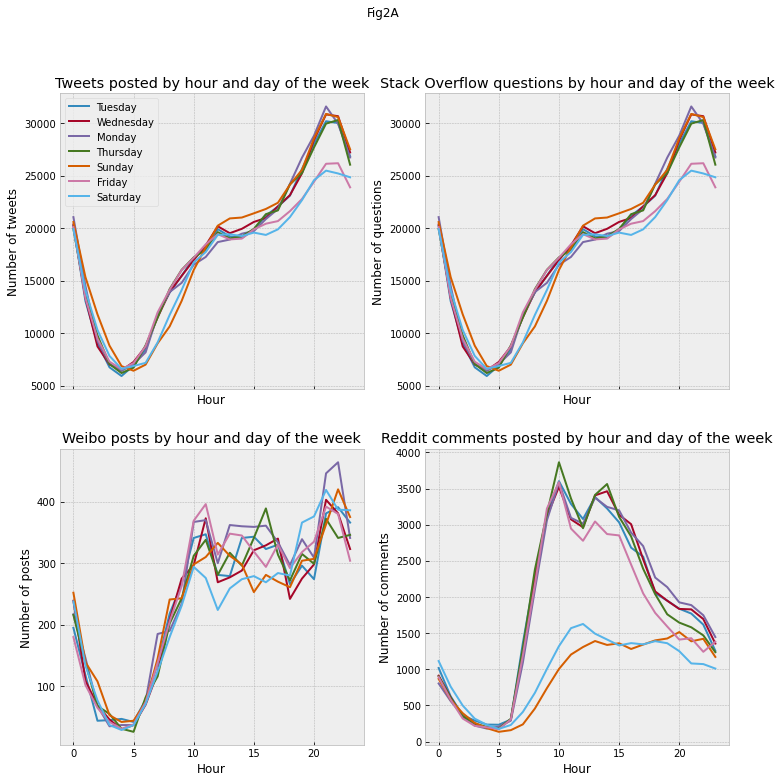

In [5]:
days=reddit_data.weekday.unique()

fig, axs = plt.subplots(2, 2, figsize=(12,12), sharex = True)
fig.suptitle('Fig2A')

for day in days:
    daily_tweets=twitter_data[twitter_data.weekday==str(day)]
    daily_weibo_posts=users_stats_weibo[users_stats_weibo.Weekday==str(day)]
    daily_reddit_comments=users_stats_reddit[users_stats_reddit.weekday==str(day)]
    
    axs[0,0].plot(daily_tweets.time_hour,daily_tweets.tweetid,label=str(day))
    axs[0,1].plot(daily_tweets.time_hour,daily_tweets.tweetid,label=str(day))
    axs[1,0].plot(daily_weibo_posts.Hour,daily_weibo_posts.post_id,label=str(day))
    axs[1,1].plot(daily_reddit_comments.time_hour,daily_reddit_comments.comment_id,label=str(day))
    
    
axs[0,0].set_title('Tweets posted by hour and day of the week')
axs[0,0].set_xlabel('Hour')
axs[0,0].set_ylabel('Number of tweets')
axs[0,1].set_title('Stack Overflow questions by hour and day of the week')
axs[0,1].set_xlabel('Hour')
axs[0,1].set_ylabel('Number of questions')
axs[1,0].set_title('Weibo posts by hour and day of the week')
axs[1,0].set_xlabel('Hour')
axs[1,0].set_ylabel('Number of posts')
axs[1,1].set_title('Reddit comments posted by hour and day of the week')
axs[1,1].set_xlabel('Hour')
axs[1,1].set_ylabel('Number of comments')
#axs[0,1].xticks(np.arange(0, 24, step=1))
axs[0,0].legend()

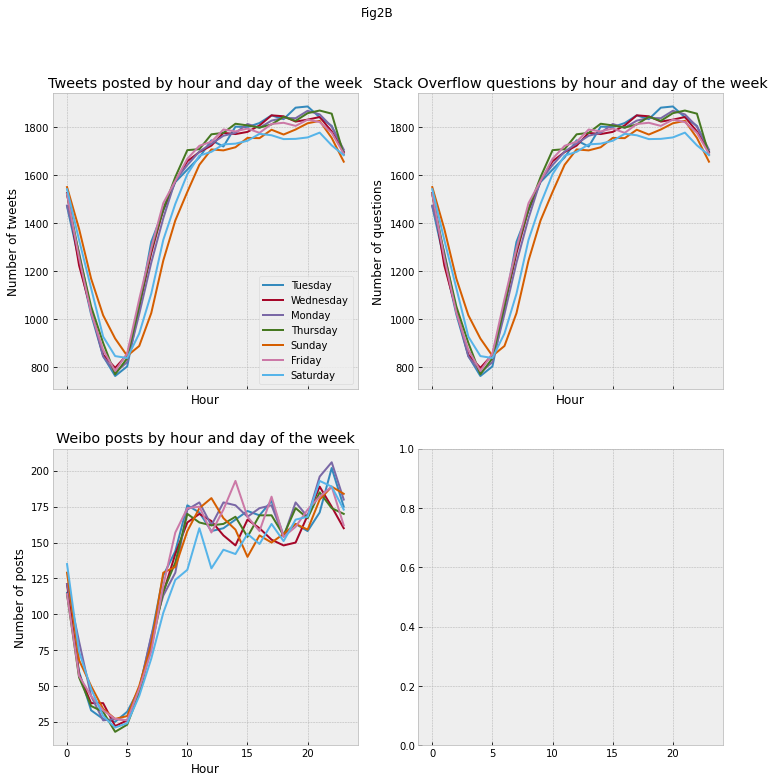

In [6]:
days=reddit_data.weekday.unique()

fig, axs = plt.subplots(2, 2, figsize=(12,12), sharex = True)
fig.suptitle('Fig2B')

for day in days:
    daily_tweets=twitter_data[twitter_data.weekday==str(day)]
    daily_weibo_posts=users_stats_weibo[users_stats_weibo.Weekday==str(day)]
    daily_reddit_comments=users_stats_reddit[users_stats_reddit.weekday==str(day)]
    
    axs[0,0].plot(daily_tweets.time_hour,daily_tweets.id,label=str(day))
    axs[0,1].plot(daily_tweets.time_hour,daily_tweets.id,label=str(day))
    axs[1,0].plot(daily_weibo_posts.Hour,daily_weibo_posts.id,label=str(day))
    
    
axs[0,0].set_title('Tweets posted by hour and day of the week')
axs[0,0].set_xlabel('Hour')
axs[0,0].set_ylabel('Number of tweets')
axs[0,1].set_title('Stack Overflow questions by hour and day of the week')
axs[0,1].set_xlabel('Hour')
axs[0,1].set_ylabel('Number of questions')
axs[1,0].set_title('Weibo posts by hour and day of the week')
axs[1,0].set_xlabel('Hour')
axs[1,0].set_ylabel('Number of posts')

#axs[0,1].xticks(np.arange(0, 24, step=1))
axs[0,0].legend()